<a href="https://colab.research.google.com/github/jclase/CSC-302-HW/blob/main/HW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("tidyverse")
install.packages("lubridate")
install.packages("rmarkdown")
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)
library(rmarkdown)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
drive_mount <- "/content/drive"
if (!dir.exists(drive_mount)) {
  system("mkdir -p /content/drive")
}
load("/content/drive/MyDrive/Colab Notebooks/DATA/house_prices.rda")


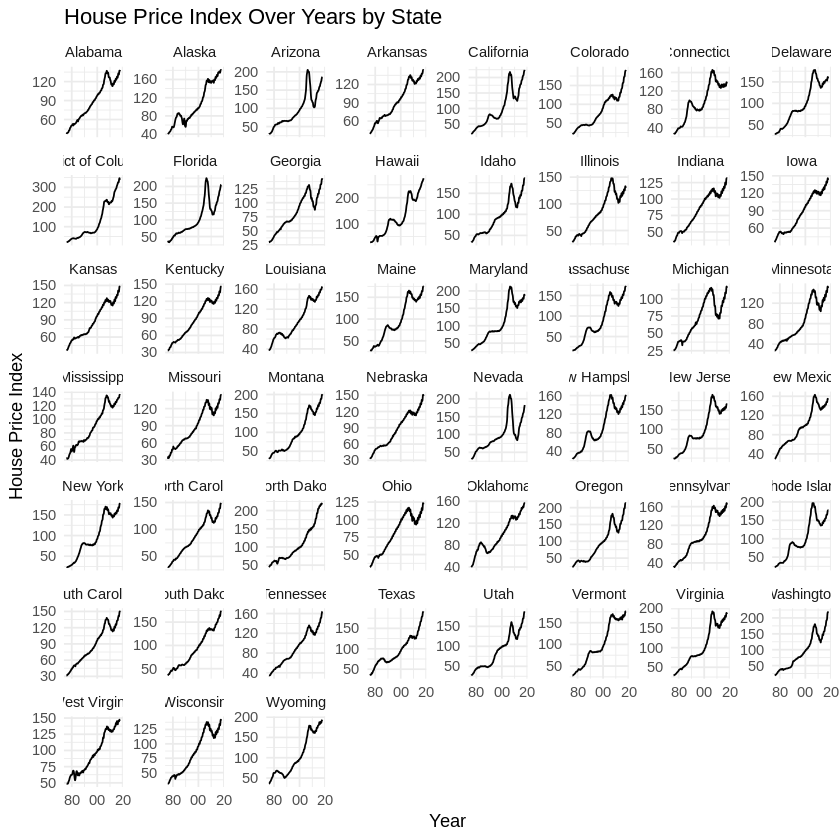

In [ ]:
ggplot(house_prices, aes(x = date, y = house_price_index, group = state)) +
  geom_line() +
  facet_wrap(~state, scales = "free_y") +
  scale_x_continuous(
    breaks = ymd(c("1980-01-01", "2000-01-01", "2020-01-01")),
    labels = c("80", "00", "20")
  ) +
  labs(
    title = "House Price Index Over Years by State",
    x = "Year",
    y = "House Price Index"
  ) +
  theme_minimal()

In [ ]:
house_reshaped <- house_prices %>%
  gather(key = measure, value = value, -c(house_price_index, date, state))
head(house_reshaped)

date,state,house_price_index,measure,value
<date>,<chr>,<dbl>,<chr>,<dbl>
1976-01-01,Alabama,37.13829,unemploy_perc,6.7
1976-02-01,Alabama,37.75644,unemploy_perc,6.7
1976-03-01,Alabama,38.27632,unemploy_perc,6.6
1976-04-01,Alabama,38.59613,unemploy_perc,6.5
1976-05-01,Alabama,38.74052,unemploy_perc,6.4
1976-06-01,Alabama,38.79723,unemploy_perc,6.5


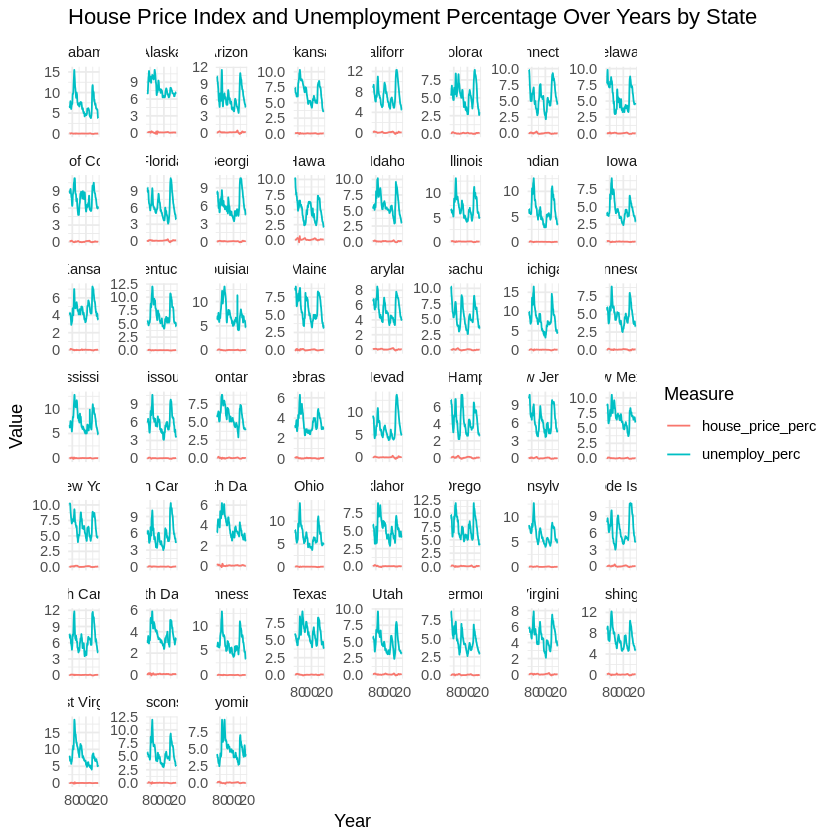

In [ ]:
ggplot(house_reshaped, aes(x = date, y = value, color = measure)) +
  geom_line() +
  facet_wrap(~state, scales = "free_y") +
  scale_x_continuous(
    breaks = ymd(c("1980-01-01", "2000-01-01", "2020-01-01")),
    labels = c("80", "00", "20")
  ) +
  labs(
    title = "House Price Index and Unemployment Percentage Over Years by State",
    x = "Year",
    y = "Value",
    color = "Measure"
  ) +
  theme_minimal()

In [ ]:
# Install Pandoc (required for rendering)
system("apt-get install -y pandoc", intern = TRUE)

# Verify Pandoc Installation
pandoc_version <- system("pandoc --version", intern = TRUE)
print(pandoc_version)

# Install Required R Packages
install.packages("tidyverse")  # Includes ggplot2, tidyr, dplyr, etc.
install.packages("lubridate")  # For date handling
install.packages("rmarkdown")  # For rendering Markdown files

# Load Libraries
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)
library(rmarkdown)

# Mount Google Drive (Ensure Access to Your File)
drive_mount <- "/content/drive"
if (!dir.exists(drive_mount)) {
  system("mkdir -p /content/drive")
}

# Load the Dataset
load("/content/drive/MyDrive/Colab Notebooks/DATA/house_prices.rda")

# Define the save path
save_path <- "/content/drive/MyDrive/Colab Notebooks/house_prices_analysis.html"

# Create the R Markdown File (FIX: Unique Chunk Labels)
writeLines(c(
  "---",
  "title: \"House Prices and Unemployment Analysis\"",
  "author: \"Jonathon Clase\"",
  "date: \"`r Sys.Date()`\"",
  "output: html_document",
  "---",
  "",
  "```{r setup_chunk_main, include=FALSE}",  # FIXED: Unique chunk name
  "knitr::opts_chunk$set(echo = TRUE)",
  "library(ggplot2)",
  "library(tidyr)",
  "library(dplyr)",
  "library(lubridate)",
  "```",
  "",
  "## Load Data",
  "```{r}",
  "load(\"/content/drive/MyDrive/Colab Notebooks/DATA/house_prices.rda\")",
  "```",
  "",
  "## Facet Wrap Plot for House Price Index",
  "```{r}",
  "ggplot(house_prices, aes(x = date, y = house_price_index, group = state)) +",
  "  geom_line() +",
  "  facet_wrap(~state, scales = \"free_y\") +",
  "  scale_x_continuous(",
  "    breaks = ymd(c(\"1980-01-01\", \"2000-01-01\", \"2020-01-01\")), ",
  "    labels = c(\"80\", \"00\", \"20\")",
  "  ) +",
  "  labs(",
  "    title = \"House Price Index Over Years by State\",",
  "    x = \"Year\",",
  "    y = \"House Price Index\"",
  "  ) +",
  "  theme_minimal()",
  "```",
  "",
  "## Reshape Data",
  "```{r}",
  "house_reshaped <- house_prices %>%",
  "  gather(key = measure, value = value, -c(house_price_index, date, state))",
  "",
  "head(house_reshaped)",
  "```",
  "",
  "## Graph for House Price Index and Unemployment Percentage",
  "```{r}",
  "ggplot(house_reshaped, aes(x = date, y = value, color = measure)) +",
  "  geom_line() +",
  "  facet_wrap(~state, scales = \"free_y\") +",
  "  scale_x_continuous(",
  "    breaks = ymd(c(\"1980-01-01\", \"2000-01-01\", \"2020-01-01\")), ",
  "    labels = c(\"80\", \"00\", \"20\")",
  "  ) +",
  "  labs(",
  "    title = \"House Price Index and Unemployment Percentage Over Years by State\",",
  "    x = \"Year\",",
  "    y = \"Value\",",
  "    color = \"Measure\"",
  "  ) +",
  "  theme_minimal()",
  "```",
  "",
  "## Conclusion",
  "The graph provides a look at house price trends and unemployment percentage over time. ",
  "Presenting both on the same scale may lead to misinterpretation, as the numerical ranges differ significantly. ",
  "A dual-axis plot or separate graphs for better visualization could improve clarity.",
  "",
  "## Rendering the HTML Report",
  "```{r}",
  "rmarkdown::render(\"house_prices_analysis.Rmd\")",
  "```"
), con = "house_prices_analysis.Rmd")

# Render the R Markdown File to HTML
rmarkdown::render("house_prices_analysis.Rmd")

# Ensure the Google Drive directory is writable
if (file.access(dirname(save_path), 2) == 0) {
  file.copy("house_prices_analysis.html", save_path, overwrite = TRUE)
  print(paste("Report successfully created and saved to:", save_path))
} else {
  print("Google Drive is read-only. Report saved in /content instead.")
  file.copy("house_prices_analysis.html", "/content/house_prices_analysis.html", overwrite = TRUE)
}


[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "pandoc is already the newest version (2.9.2.1-3ubuntu2)."       
[5] "0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded."

[1] "pandoc 2.9.2.1"                                                         
[2] "Compiled with pandoc-types 1.20, texmath 0.12.0.2, skylighting 0.8.5"   
[3] "Default user data directory: /root/.local/share/pandoc or /root/.pandoc"
[4] "Copyright (C) 2006-2020 John MacFarlane"                                
[5] "Web:  https://pandoc.org"                                               
[6] "This is free software; see the source for copying conditions."          
[7] "There is no warranty, not even for merchantability or fitness"          
[8] "for a particular purpose."                                              


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



processing file: house_prices_analysis.Rmd



1/12                   
2/12 [setup_chunk_main]
3/12                   
4/12 [unnamed-chunk-1] 
5/12                   
6/12 [unnamed-chunk-2] 
7/12                   
8/12 [unnamed-chunk-3] 
9/12                   
10/12 [unnamed-chunk-4] 
11/12                   
12/12 [unnamed-chunk-5] 


ERROR: [1m[33mError[39m in `parse_block()`:[22m
[33m![39m Duplicate chunk label 'setup_chunk_main', which has been used for the chunk:
knitr::opts_chunk$set(echo = TRUE)
library(ggplot2)
library(tidyr)
library(dplyr)
library(lubridate)


output file: house_prices_analysis.knit.md




/usr/bin/pandoc +RTS -K512m -RTS house_prices_analysis.knit.md --to html4 --from markdown+autolink_bare_uris+tex_math_single_backslash --output house_prices_analysis.html --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/pagebreak.lua --lua-filter /usr/lib/R/site-library/rmarkdown/rmarkdown/lua/latex-div.lua --self-contained --variable bs3=TRUE --section-divs --template /usr/lib/R/site-library/rmarkdown/rmd/h/default.html --no-highlight --variable highlightjs=1 --variable theme=bootstrap --mathjax --variable 'mathjax-url=https://mathjax.rstudio.com/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML' --include-in-header /tmp/RtmpUzYiwP/rmarkdown-str36b1c25c5fd.html 



Output created: house_prices_analysis.html



[1] "Report successfully created and saved to: /content/drive/MyDrive/Colab Notebooks/house_prices_analysis.html"
